# 파이썬 X 스타벅스 매장 데이터와 지도

<img src="https://trello-attachments.s3.amazonaws.com/59103d52b56a24582f00dc97/5ac93a434b751dc44a8343a2/c72f462e0e181d33c5059c592087d9c9/image.png"></img>

- requests 위치 데이터 가져오기
- json_normalize() : JSON 데이터 DataFrame 으로 전환
- folium 을 사용하여 지도에 위치 표시

## 스타벅스 매장 찾기

http://www.istarbucks.co.kr
- STORE >> 매장 찾기
- 지역검색 >> 울산 >> 전체

In [1]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
data = {
    'ins_lat':'35.550548', # 지정한 위도와 경도에서 가까운 순으로 나열
    'ins_lng':'129.298364',
    'p_sido_cd':'06', # 06 = 울산
    'p_gugun_cd':'',  # 세부지역 (지정하지 않으면 시/도 전체)
    'in_biz_cd':'',
    'set_date':'',
    'iend':'1000',
}
    
url = 'https://www.istarbucks.co.kr/store/getStore.do'
r = requests.post(url, data=data)

r.text[:1000] # 수신된 데이터의 앞부분만 확인

'{"list":[{"seq":0,"sido_cd":null,"sido_nm":null,"gugun_cd":null,"gugun_nm":null,"code_order":null,"view_yn":null,"store_num":null,"sido":null,"gugun":null,"address":null,"new_img_nm":null,"p_pro_seq":0,"p_view_yn":null,"p_sido_cd":"","p_gugun_cd":"","p_store_nm":null,"p_theme_cd":null,"p_wireless_yn":null,"p_smoking_yn":null,"p_book_yn":null,"p_music_yn":null,"p_terrace_yn":null,"p_table_yn":null,"p_takeout_yn":null,"p_parking_yn":null,"p_dollar_assent":null,"p_card_recharge":null,"p_subway_yn":null,"stb_store_file_renew":null,"stb_store_theme_renew":null,"stb_store_time_renew":null,"stb_store_lsm":null,"s_code":"601","s_name":"울산태화","tel":"052-248-6589","fax":"052-248-6590","sido_code":"06","sido_name":"울산","gugun_code":"0604","gugun_name":"중구","addr":"울산광역시 중구 태화동 483-10번지 (1층,2층 전체)","park_info":null,"new_state":"Y","theme_state":"T17@T16@T05@T08@T04@T20","new_bool":0,"search_text":"","ins_lat":"","ins_lng":"","in_distance":0,"out_distance":"0","all_search_cnt":-1,"addr_search_cnt"

데이터는 JSON으로 수신되며, 형태는 다음과 같다.

```json
{
  "list": [
      {
            // ... 중략 ...
            "s_code": "1311",
            "s_name": "방화DT",
            "tel": "02-2664-3480",
            "fax": "02-2664-3481",
            "sido_code": "01",
            "sido_name": "서울",
            "gugun_code": "0103",
            "gugun_name": "강서구",
            "addr": "서울특별시 강서구 방화동 293-4",
            "park_info": null,
            "new_state": null,
            "theme_state": "T17@T16@T09@T20@T01@T05@T08@T04",
            // ... 중략 ...
            "lat": "37.574339",
            "lot": "126.816415",
            "t22": 0
        },
        {
            // ... 중략 ...
            "s_code": "1267",
            "s_name": "마곡나루역",
            "tel": "02-3662-3504",
            "fax": "02-3662-3505",
            "sido_code": "01",
            "sido_name": "서울",
            "gugun_code": "0103",
            "gugun_name": "강서구",
            "addr": "서울특별시 강서구 마곡동 759-3 보타닉파크타워Ⅰ105,203,204호",
            "park_info": null,
            "new_state": null,
            "theme_state": "T08@T05@T04@T17@T16@P80@T20",
            // ... 중략 ...
            "lat": "37.56813",
            "lot": "126.82614",
            "t22": 0
        },
    ]
 }
```


# JSON to DataFrame

json_normaliz() 를 사용하여 JSON 데이터를 DataFrame로 전환

In [3]:
jo = json.loads(r.text)
df = json_normalize(jo, 'list')

In [4]:
# 행(row) 수, 울산 23개 매장
len(df)

23

In [5]:
# 컬럼수 111개
df.columns

Index(['addr', 'addr_search_cnt', 'address', 'all_search_cnt', 'code_order',
       'cold_blew', 'defaultimage', 'disp', 'doro_address', 'espresso',
       ...
       't06', 't09', 't10', 't12', 't20', 't22', 'tel', 'theme_state', 'vSal',
       'view_yn'],
      dtype='object', length=111)

In [6]:
# 주요한 컬럼 몇 가지 선택

df = df[['s_name', 'lat', 'lot', 'sido_name','gugun_name','doro_address','tel']]
df

s_name          lat                 lot sido_name gugun_name  \
0        울산태화    35.550548          129.298364        울산         중구   
1        울산옥동   35.5355131  129.28965070000004        울산         남구   
2   울산시청사거리DT    35.537276          129.313613        울산         남구   
3     울산성남삼거리    35.553215          129.320479        울산         중구   
4       울산성남동  35.55396882           129.32119        울산         중구   
5       울산공업탑    35.533403           129.31085        울산         남구   
6     울산남구청DT   35.5441545  129.32459960000006        울산         남구   
7        울산신복    35.547956           129.26287        울산         남구   
8       울산센트럴    35.538827          129.332793        울산         남구   
9      울산삼산대로    35.539174          129.335097        울산         남구   
10        울산대    35.542467          129.260197        울산         남구   
11     울산삼산타워    35.539484          129.336761        울산         남구   
12  울산중리사거리DT     35.54388  129.33868310000002        울산         남구   
13      울산삼산로   35.5384838         129.3373025        울산         남구   
14    울산디자인거리    35.540501           129.33876        울산         남구   
15       울산성안    35.577829          129.324413        울산         중구   
16       울산진장    35.562433          129.356469        울산         북구   
17    울산북구청DT    35.583521          129.358882        울산         북구   
18       울산화봉    35.588615          129.367334        울산         북구   
19       현대동구  35.52114999         129.4317341        울산         동구   
20    울산테라스파크    35.499635          129.429599        울산         동구   
21   울산정자비치DT    35.628685          129.440824        울산         북구   
22      울산간절곶   35.3590048         129.3591978        울산        울주군   

                           doro_address           tel  
0    울산광역시 중구 신기길 103, (1층,2층 전체) (태화동)  052-248-6589  
1                 울산광역시 남구 문수로 329 (옥동)  052-227-7982  
2                 울산광역시 남구 중앙로 182 (달동)  052-273-3312  
3              울산광역시 중구 젊음의2거리 33 (성남동)  052-212-3346  
4               울산광역시 중구 젊음의거리 74 (성남동)  052-248-1984  
5                 울산광역시 남구 삼산로 27 (신정동)  052-258-8461  
6                울산광역시 남구 번영로 215 (신정동)  052-256-3207  
7                울산광역시 남구 대학로 152 (무거동)  052-277-8742  
8                 울산광역시 남구 삼산로 231 (달동)  052-274-3243  
9             울산광역시 남구 삼산로 257, 1층 (달동)  052-256-9380  
10           울산광역시 남구 대학로84번길 5-3 (무거동)  052-225-8829  
11          울산광역시 남구 삼산로 273 (삼산동) 삼산타워  052-276-6988  
12               울산광역시 남구 돋질로 310 (삼산동)  052-266-3208  
13          울산광역시 남구 삼산로 278 번길 8 (삼산동)  052-268-9878  
14   울산광역시 남구 삼산중로74번길 30-1, 1~2층 (삼산동)  052-256-4702  
15              울산광역시 중구 성안12길 45 (성안동)  052-212-3259  
16              울산광역시 북구 진장17길 10 (진장동)  052-916-0154  
17              울산광역시 북구 산업로 1011 (연암동)  052-289-3503  
18                울산광역시 북구 화봉로 75 (화봉동)  052-289-8729  
19  울산광역시 동구 방어진순환도로 899 (서부동) 현대백화점주차장  052-250-4168  
20           울산광역시 동구 방어진순환도로 652 (일산동)  052-233-8419  
21             울산광역시 북구 동해안로 1601 (산하동)  052-297-3306  
22              울산광역시 울주군 서생면 대송리 25-18  052-238-5947

# Feature 타입 바꾸기

In [7]:
df.dtypes

s_name          object
lat             object
lot             object
sido_name       object
gugun_name      object
doro_address    object
tel             object
dtype: object

## lat, lot 타입으로 전환 (str -> float)

In [8]:
df['lat'] = df['lat'].astype(float)
df['lot'] = df['lot'].astype(float)

In [9]:
df.dtypes

s_name           object
lat             float64
lot             float64
sido_name        object
gugun_name       object
doro_address     object
tel              object
dtype: object

## 특정 지점 선정

In [10]:
df[df['s_name'] == '울산태화'] # 울산태화점

s_name        lat         lot sido_name gugun_name  \
0   울산태화  35.550548  129.298364        울산         중구   

                         doro_address           tel  
0  울산광역시 중구 신기길 103, (1층,2층 전체) (태화동)  052-248-6589

스타벅스 울산태화점의 위도(lat)와 경도(lot)는 각각 35.550548, 129.298364

# folium

In [11]:
import folium

# 서울 시청 
map_osm = folium.Map(location=(35.550548, 129.298364))
map_osm

지도를 상하좌우로 움직이거나 확대/축소 할 수 있다

In [12]:
# 확대 지점 (zoom_start)
map_osm = folium.Map(location=(35.550548, 129.298364), zoom_start=17)
map_osm

In [13]:
# 지도 tiles 지정
map_osm = folium.Map(location=(35.550548, 129.298364), zoom_start=17, tiles = 'Stamen Toner')
map_osm

In [14]:
울산태화 = (35.550548, 129.298364)

map_osm = folium.Map(location=울산태화, zoom_start=17)
folium.Marker(울산태화, popup='울산태화점').add_to(map_osm)
map_osm

# 울산의 스(타벅스)세권 분석

In [15]:
map_osm = folium.Map(location=울산태화, zoom_start=13)

for ix, row in df.iterrows():
    location = (row['lat'], row['lot'])
    folium.Marker(location, popup=row['s_name'] + '점').add_to(map_osm)
map_osm

# 요약

- requests.post() 데이터 가져오기
- json_normalize() : JSON 데이터 DataFrame 으로 전환
- folium 을 사용하여 지도에 위치 표시

# 교통량 정보

http://utrhub.its.ulsan.kr/

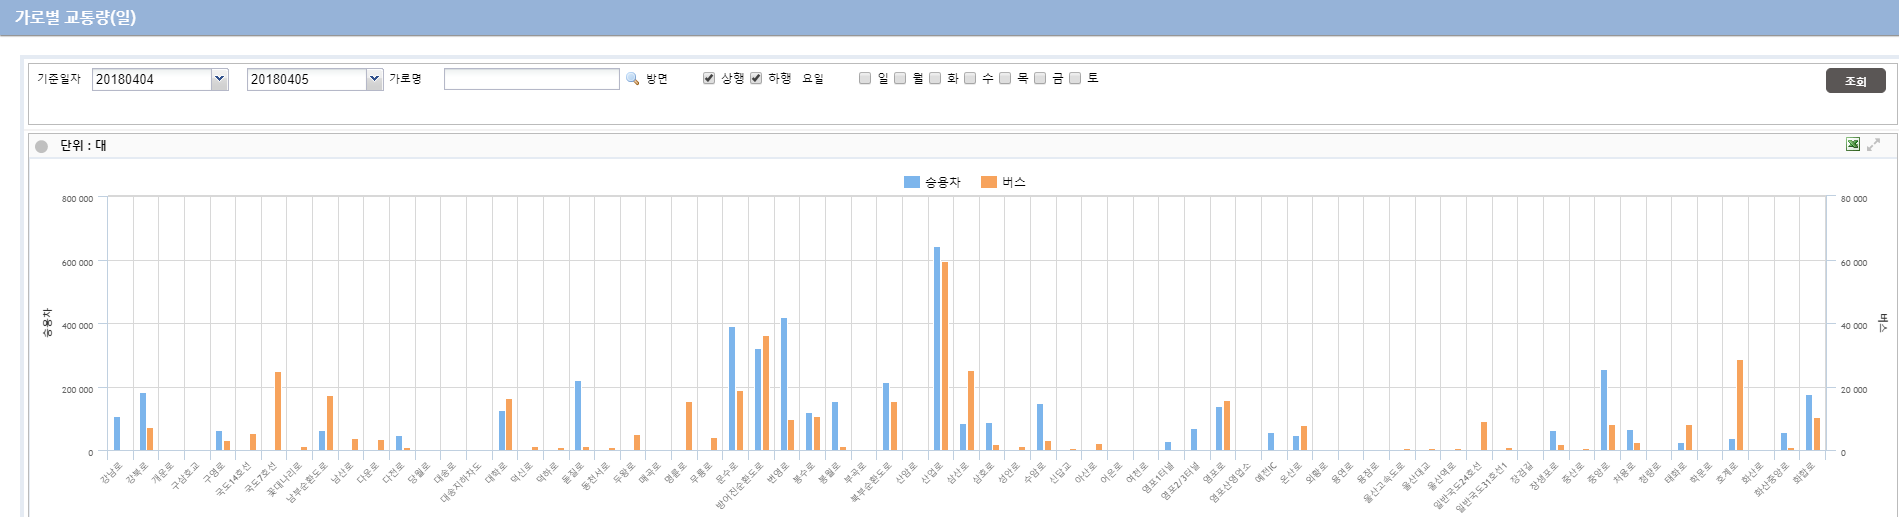

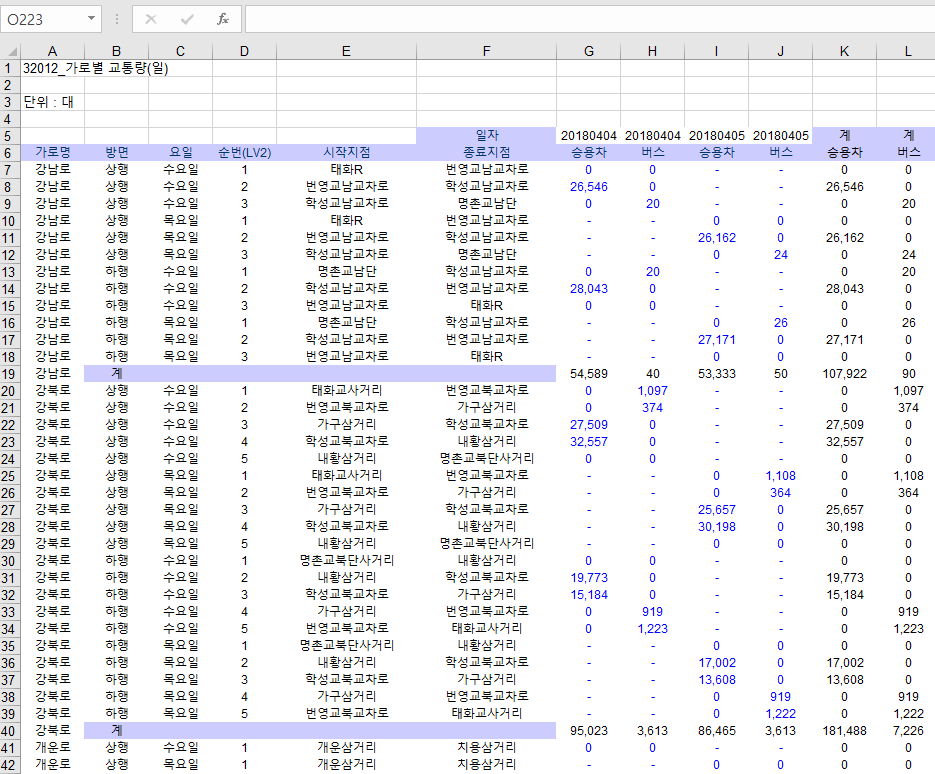

가로별 교통량 정보 (일별/ 월별 등 확인 가능)

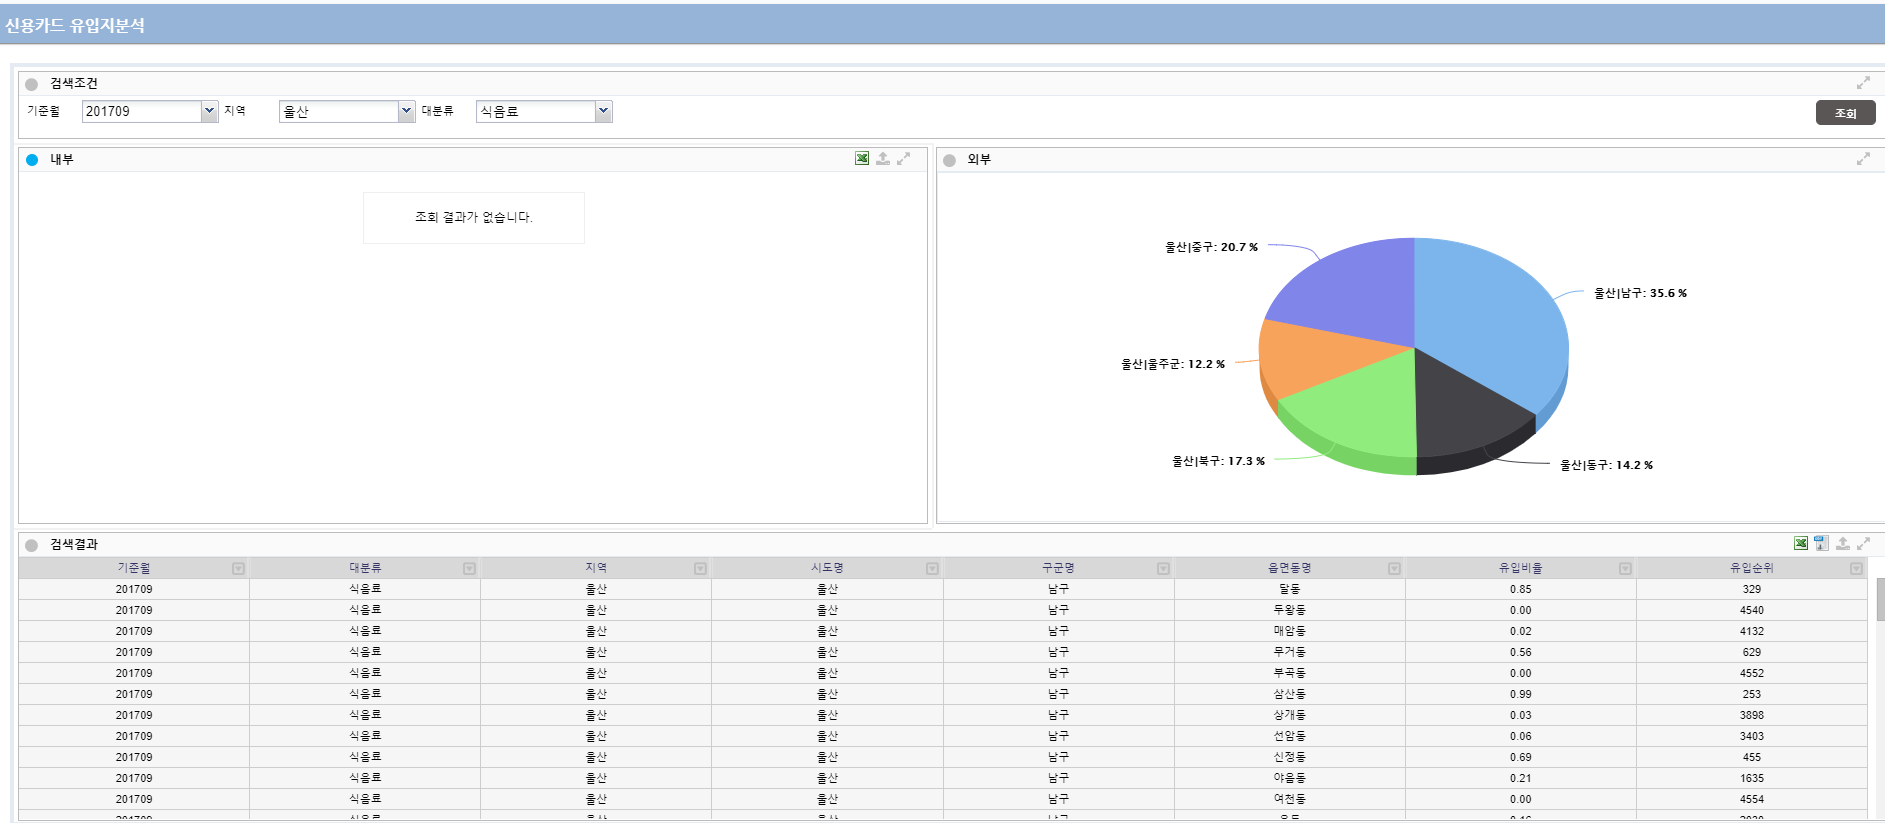

신용카드 유입지 분석 
- http://utrhub.its.ulsan.kr/info/BiViewer.do?bid=ee60e1d6-64ab4fa2

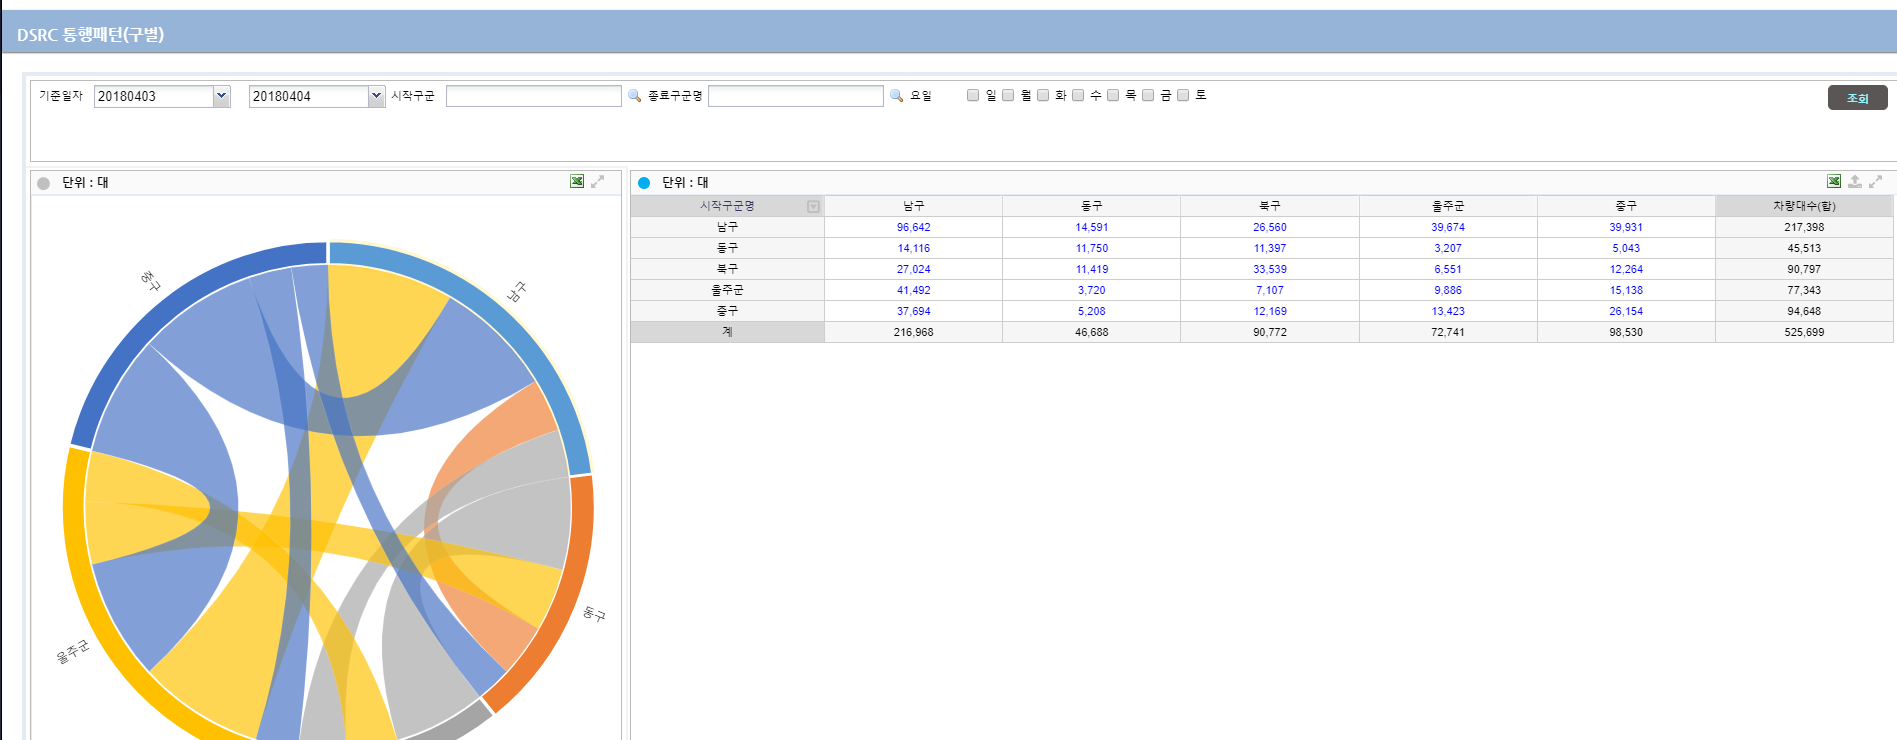

DSRC 통행패턴 분석

- 통계청, 국가통계포털, SGIS 등 자료 찾아보기
- 울산광역시 통계 : http://www.ulsan.go.kr/stat/index

상권 분석 자료
- https://m.blog.naver.com/PostView.nhn?blogId=jumpo119&logNo=80211191268&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F
- https://brunch.co.kr/@riglobalization/77
- http://blog.daum.net/_blog/BlogTypeView.do?blogid=0d2i6&articleno=8090&categoryId=0&regdt=20151205004941
- http://gisutd.com/?p=4259
- 구글 검색